# The Sparks Foundation



# Task 1: Prediction using Supervised ML



# By: Umrah Zargar 

We will be predicting the score for a student, if the student studies for 9.25 hours/day.

In [1]:
#importing all the libraries.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#importing and reaading the dataset
dataset = pd.read_csv("C:/Users/umrahzargar/Desktop/THE SPARKS FOUNDATION/Student_scores.csv")

In [3]:
#the first five values in the dataset
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#number of rows and columns
dataset.shape

(25, 2)

In [5]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


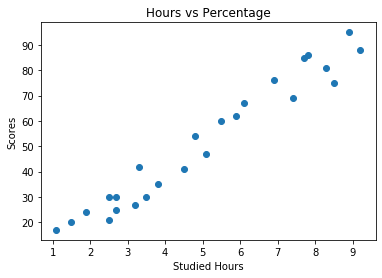

In [6]:
plt.scatter(dataset['Hours'], dataset['Scores'])
plt.title('Hours vs Percentage')
plt.xlabel('Studied Hours')
plt.ylabel('Scores')
plt.show()

# Train-Test Split

In [7]:
#X will take all the values except for the last column which is our dependent variable (target variable)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Training the Simple Linear Regression model on the Training set

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

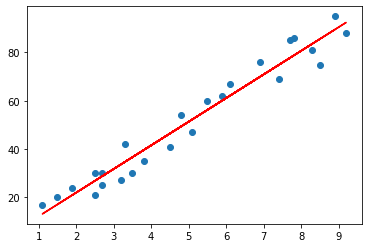

In [10]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color = 'red');
plt.show()

In [11]:
#Predicting the Test set results
y_pred = regressor.predict(X_test)
print(y_pred)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


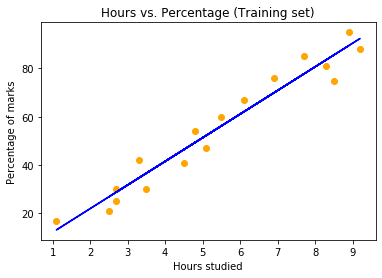

In [12]:
#Visualising the Training set results
plt.scatter(X_train, y_train, color = 'orange')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs. Percentage (Training set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')
plt.show()

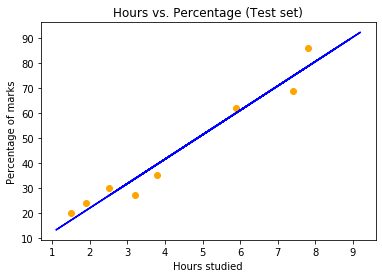

In [13]:
#Visualising the Test set results
plt.scatter(X_test, y_test, color = 'orange')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs. Percentage (Test set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')
plt.show()

In [14]:
#Comparing the actual values with the predicted ones.
dataset = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
dataset 

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [15]:
#predicting the score 
dataset = np.array(9.25)
dataset = dataset.reshape(-1, 1)
pred = regressor.predict(dataset)
print("If the student studies for 9.25 hours/day, the score is {}.".format(pred))

If the student studies for 9.25 hours/day, the score is [92.91505723].


# ERROR METRICS

In [16]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.419727808027652


In [17]:
from sklearn.metrics import r2_score

print("The R-Square of my model is: ",r2_score(y_test,y_pred))

The R-Square of my model is:  0.9568211104435257


# THANK YOU